## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [73]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [90]:
# (your)My code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
print("Размер :", data.shape)
pd.concat([data.head(), data.tail()])

Размер : (1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

### **My answer:**

#### **credit_risk**(good / bad) - целевая переменная

*   Пропусков в данных нет.

*   **Количественные**: ***duration***; ***amount***; ***age***.

*   **Бинарные**: ***people_liable***(2 варианта); ***telephone***(yes (under customer name) / no); ***foreign_worker***(yes / no).

*   **Порядковые**: ***employment_duration***(упорядочен согласно описанию); ***installment_rate***(можно сравнить); ***present_residence***(можно сравнить); ***number_credits***(явно можно сравнить); ***job***(в целом, тоже можно сравнить: кто-то круче, кто-то нет).

*   **Категориальные**: ***status***(нельзя сравнить, следовательно, упорядочить тоже нельзя из-за 'no checking account'); ***credit_history***(если и есть порядок, то он максимально сложный и оставляет много вопросов, дабы избежать различных приколов - лучше оставить категориальным); ***purpose***(тоже нет смысла выделять порядок, потому что у каждого он свой); ***savings***(тоже из-за 'unknown' проблема с порядком); ***personal_status_sex***(не хочу заниматься сексизмом :D); ***other_debtors***(нельзя выделить порядок); ***property***(слишком сложно выделить порядок, тем более с 'unknown'); ***other_installment_plans***(нельзя выделить порядок); ***housing***(нельзя выделить порядок).

In [75]:
# (your)My code here
print(data.isna().sum())
print()
for column in data:
    print(column, ":", set(data[column]), ";", len(set(data[column])))
    print()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

status : {'0<= ... < 200 DM', 'no checking account', '... >= 200 DM / salary for at least 1 year', '... < 0 DM'} ; 4

duration : {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72} ; 33

credit_history : {'all credits at this bank paid back duly', 'no credits taken/all credits paid back duly', 'delay 

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [76]:
# (your)My code here
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [77]:
# (your)My code here
# 1
print("1q : ", data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['age'] < 30].shape[0] * 100, "%")

# 2
print("2q : ", data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0] * 100, "%")

1q :  66.66666666666666 %
2q :  68.01470588235294 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [78]:
# (your)My code here
# number_credits : {'2-3', '>= 6', '1', '4-5'}
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))].shape[0]

1

### Задание 6 (1 балл)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

***Хз какой вывод... просто получилось прикольно и красиво =)***

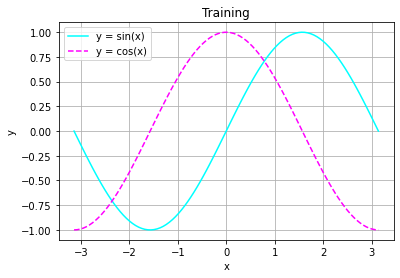

In [80]:
# (your)My code here
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
#plt.plot(x, y1, 'c', x, y2, '--m')     # можно так - это заменяет две строчки снизу
plt.plot(x, y1, color='cyan')
plt.plot(x, y2, color='magenta', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training')
plt.grid()
plt.legend(['y = sin(x)', 'y = cos(x)'])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

### **My analysis:**

* *Те, у кого **'no checking account'**, как вызывают доверие, так и не вызывают, и данное соотношение примерно равное (50/50).*

* *У кого **'... < 0'** и **'0 <= ... < 200'**, больше вызывают доверие, чем недоверие (в таких, у которых такие размеры текущего счета, больше уверенность, что они погасят кредит).*

* *А к тем, у кого **'... >= 200'**, гораздо больше доверия, чем недоверия, и это, в целом, логично, потому что с такими средствами, они явно будут добросовестно и вовремя погашать кредит.*

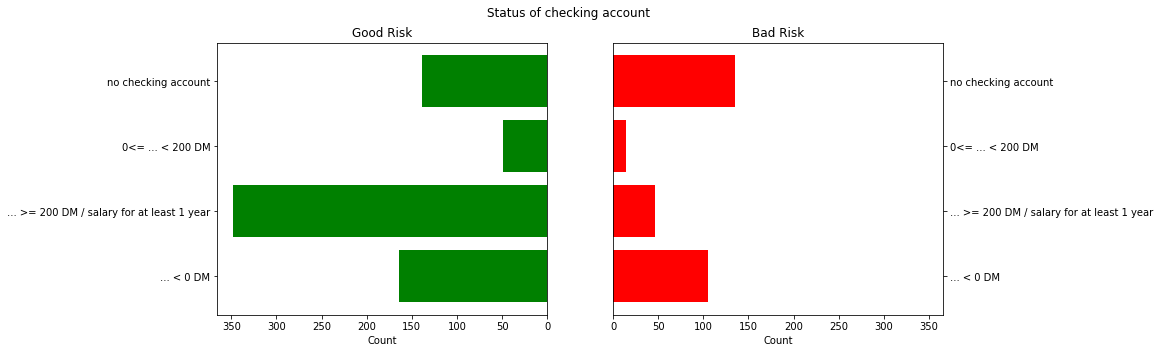

In [81]:
# (your)My code here
figure, axes = plt.subplots(1, 2, figsize=(13, 5))

labels_name = data.groupby('status')['status'].unique().index
special_data = data['credit_risk'] == 'good'

axes[0].barh(labels_name, data[special_data].groupby('status')['credit_risk'].count(), color='green')
axes[0].set_title('Good Risk')
axes[0].set_xlabel('Count')

axes[1].barh(labels_name, data[~special_data].groupby('status')['credit_risk'].count(), color='red')
axes[1].set_title('Bad Risk')
axes[1].set_xlabel('Count')

plt.setp(axes, xlim=max(axes[0].get_xlim(), axes[1].get_xlim()))

axes[0].invert_xaxis()

axes[1].yaxis.tick_right()

figure.suptitle('Status of checking account')

plt.show()

### Задание 8  (0.5 балла)

In [82]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

### **My analysis:**

* *Странно, что те, у кого **'unknown/no savings account'**, получали больше всего доверия, как и недоверия, но всё же им больше доверяли.*

* *И к тем, у кого **'... < 100'**, больше доверяли, чем недоверяли.*

* *В тех, у кого **'100 <= ... < 500'** и **'500 <= ... < 1000'**, значительно больше было уверенности, и это вполне логично.*

* *А в тех, у кого **'... >= 1000'**, гораздо больше уверенности, чем неуверенности, и это тоже логично, потому что с такими сбережениями, они явно будут добросовестно и вовремя погашать кредит.*

*С точки зрения трудоёмкости написания кода, естественно, больше всего нравится этот вариант, **в 4 раза меньше строк!!!** В добавок, на предыдущий график я убил колосальное кол-во времени, а этот сделал ооочень быстро :D.*

*И с точки зрения восприятие результата, этот график более наглядный, потому что столбцы сразу находятся в сравнение по высоте, а на предыдущем порой приходилось посматривать на шкалу.*

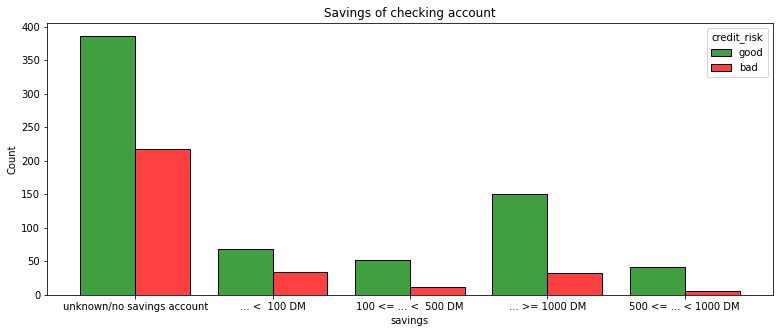

In [83]:
# (your)My code here
plt.figure(figsize=(13, 5))
plt.title('Savings of checking account')
sns.histplot(data=data, x='savings', hue='credit_risk', multiple="dodge", shrink=.8, palette=["green", "red"])
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

### **My analysis:**

* *В общем и целом, примерно у всех одинаковые возраст доверия и недоверия (25-35)*

* * ***'unknown/no savings account'*** *: 24-32 - возраст доверия, 23-29 - возраст недоверия ;*
* * ***'... < 100'*** *: 26-34 - возраст доверия, 24-31 - возраст недоверия ;*

* * ***'100 <= ... < 500'*** *: 28-39 - возраст доверия, 22-35 - возраст недоверия ;*

* * ***'... >= 1000'*** *: 25-40 - возраст доверия, 23-37 - возраст недоверия ;*

* * ***'500 <= ... < 1000'*** *: 27-38 - возраст доверия, 20-60 - возраст недоверия(почти каждому возрасту недоверяли одинаково) ;*

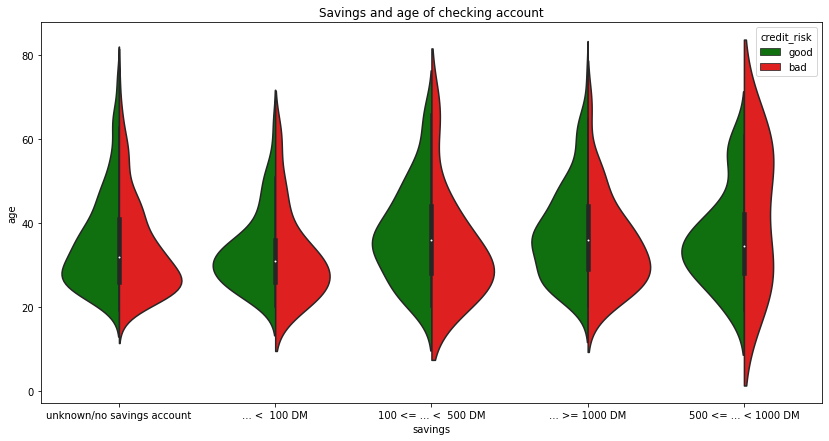

In [84]:
# (your)My code here
plt.figure(figsize=(14, 7))
plt.title('Savings and age of checking account')
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True, palette=["green", "red"])
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

### **My analysis:**

* *Мои **мысли** из предыдущего задания оказались **верны!** Больше всего заявок на кредит делали люди в возрасте **от 25 до 35**, поэтому больше всего одобрений и отказов делалось людям 25-35 лет.*

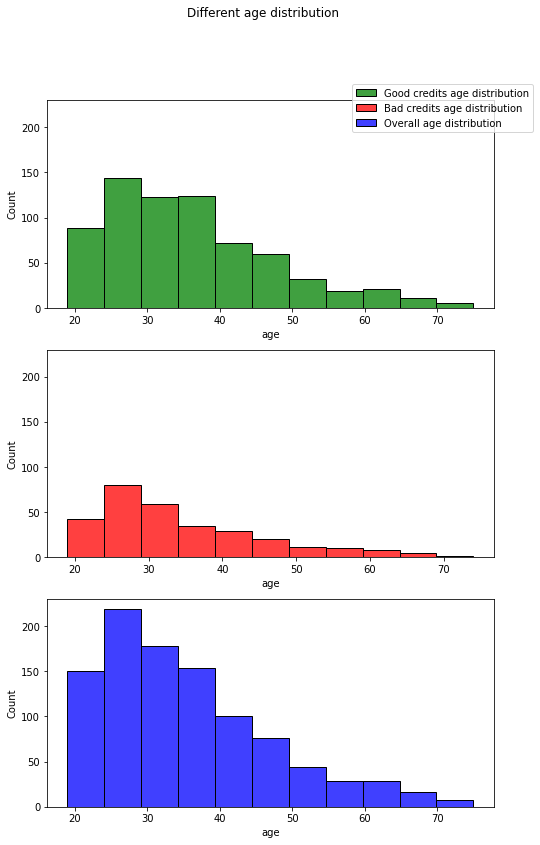

In [85]:
# (your)My code here
figure, axes = plt.subplots(3, 1, figsize=(8, 13))

good_data = data['credit_risk'] == 'good'

# закомментированный кусок реализует графики с помощью matplotlib'а - получается всё тоже самое, как в примере
'''
axes[0].hist(data[good_data]['age'], bins=11, color='green')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

axes[1].hist(data[~good_data]['age'], bins=11, color='red')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

axes[2].hist(data['age'], bins=11)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
'''

#а это реализует графики с помощью seaborn'а - они мне больше нравятся, потому что красивые и контрастные =)
sns.histplot(data=data[good_data], x='age', bins=11, color='green', ax=axes[0])
sns.histplot(data=data[~good_data], x='age', bins=11, color='red', ax=axes[1])
sns.histplot(data=data, x='age', bins=11, color='blue', ax=axes[2])

plt.setp(axes, ylim=max(axes[0].get_ylim(), axes[1].get_ylim(), axes[2].get_ylim()))

upper_hist = axes[0].get_position()
figure.legend(['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'], 
              bbox_to_anchor=[upper_hist.x0 + 1.1*upper_hist.width, upper_hist.y0 + 1.1*upper_hist.height])
figure.suptitle('Different age distribution')

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

### **My analysis:**

* *Больше всего заявок было на кредит суммой **до 7500** и на срок **до 48**. В этом диапазоне находится основная часть данных.*

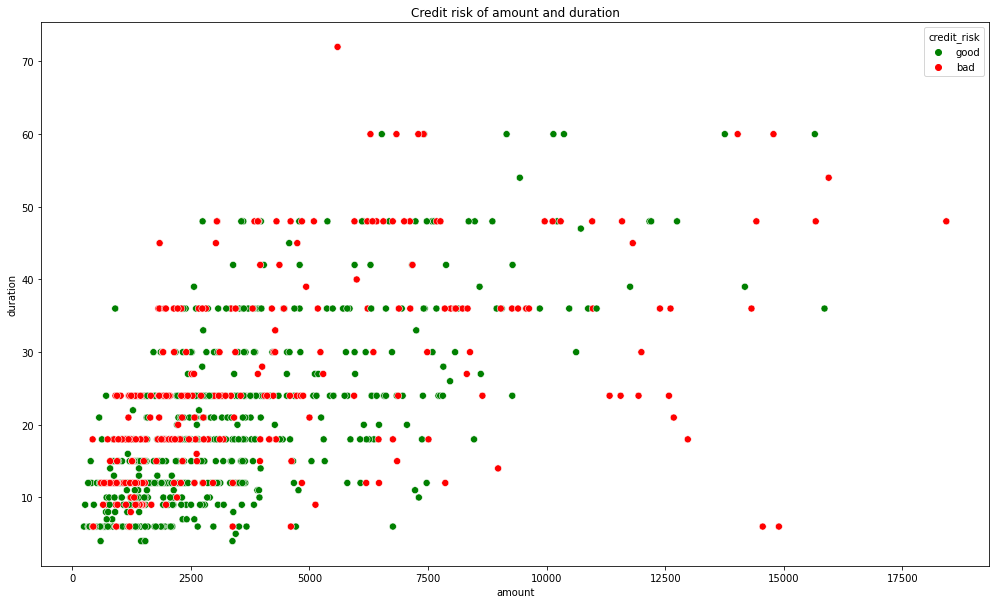

In [86]:
# (your)My code here
plt.figure(figsize=(17, 10))
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', s=50, palette=["green", "red"])
plt.title('Credit risk of amount and duration')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

### **My analysis:**

* *Больше всего заявок было на кредит суммой **до 7500** и на срок **до 48** и в возрасте **до 35**. В этом диапазоне находится основная часть данных.*

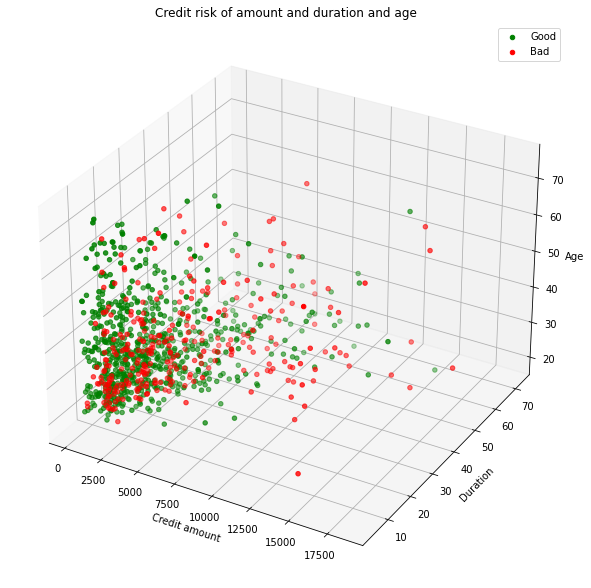

In [87]:
# (your)My code here
from matplotlib.figure import projections
figure = plt.figure(figsize=(10, 13))
axis = figure.add_subplot(projection='3d')

good_data = data['credit_risk'] == 'good'

x_good = data[good_data]['amount']
y_good = data[good_data]['duration']
z_good = data[good_data]['age']

x_bad = data[~good_data]['amount']
y_bad = data[~good_data]['duration']
z_bad = data[~good_data]['age']

axis.scatter(x_good, y_good, z_good, color='green')
axis.scatter(x_bad, y_bad, z_bad, color='red')

axis.set_xlabel('Credit amount')
axis.set_ylabel('Duration')
axis.set_zlabel('Age')

plt.legend(['Good', 'Bad'])
plt.title('Credit risk of amount and duration and age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [91]:
# (your)My code here
data['credit_risk'] = data['credit_risk'].apply(lambda ans: 0 if ans == 'bad' else 1)
data['foreign_worker'] = data['foreign_worker'].apply(lambda wor: 0 if wor == 'no' else 1)
data['telephone'] = data['telephone'].apply(lambda tel: 0 if tel == 'no' else 1)
data['people_liable'] = data['people_liable'].apply(lambda lia: 0 if lia == '0 to 2' else 1)
data['job'] = data['job'].map({'unemployed/unskilled - non-resident' : 0, 
                               'unskilled - resident' : 1, 
                               'skilled employee/official' : 2, 
                               'manager/self-empl./highly qualif. employee' : 3})
data['number_credits'] = data['number_credits'].map({'1' : 0, 
                                                     '2-3' : 1, 
                                                     '4-5' : 2, 
                                                     '>= 6' : 3})
data['present_residence'] = data['present_residence'].map({'< 1 yr' : 0, 
                                                           '1 <= ... < 4 yrs' : 1, 
                                                           '4 <= ... < 7 yrs' : 2, 
                                                           '>= 7 yrs' : 3})
data['installment_rate'] = data['installment_rate'].map({'< 20' : 0, 
                                                         '20 <= ... < 25' : 1, 
                                                         '25 <= ... < 35' : 2, 
                                                         '>= 35' : 3})
data['employment_duration'] = data['employment_duration'].map({'unemployed' : 0, 
                                                               '< 1 yr' : 1, 
                                                               '1 <= ... < 4 yrs' : 2, 
                                                               '4 <= ... < 7 yrs' : 3, 
                                                               '>= 7 yrs' : 4})

data = data.drop(columns=['status', 'credit_history', 'purpose', 'savings',
                   'personal_status_sex', 'other_debtors', 'property',
                   'other_installment_plans', 'housing'])

print("Размер :", data.shape)
pd.concat([data.head(), data.tail()])

Размер : (1000, 12)


,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,1,0,3,21,0,2,0,0,0,1
1,9,2799,2,2,1,36,1,2,1,0,0,1
2,12,841,3,2,3,23,0,1,0,0,0,1
3,12,2122,2,1,1,39,1,1,1,0,1,1
4,12,2171,2,0,3,38,1,1,0,0,1,1
995,24,1987,2,2,3,21,0,1,1,0,0,0
996,24,2303,4,0,0,45,0,2,0,0,0,0
997,21,12680,4,0,3,30,0,3,0,1,0,0
998,12,6468,0,2,0,52,0,3,0,1,0,0
999,30,6350,4,0,3,31,0,2,0,0,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [92]:
def get_weights(Xtrain: np.array, ytrain: np.array) -> np.array:
    return np.matmul(np.matmul(inv(np.matmul(Xtrain.transpose(), Xtrain)), Xtrain.transpose()), ytrain)     # ((X.T * X)^(-1)) * X.T * y

def get_accuracy(ytrain: np.array, trainpredict: np.array, sep: float) -> np.array:
    trainpredict[trainpredict > sep] = 1
    trainpredict[trainpredict <= sep] = 0
    return accuracy_score(ytrain, trainpredict)

def predict(Xtest: np.array) -> np.array:
    # (your)My code here
    # Solution №3
    ans = np.matmul(X_test, weights)
    ans[ans > separator] = 1
    ans[ans <= separator] = 0
    return ans

    # Solution №1
    #return np.ones(X_test.shape[0], dtype=np.int64)    # если всем доверяем и особо не паримся над формулой -- сразу получаем кайфовый accuracy=0.66

    # Solution №2
    #weights = np.array([3, -0.01, 1, 1, 1, -0.1, -1, 5, -1, 1, 2])     # мною лично подобранные веса
    #ans = np.matmul(X_test, weights)
    #ans[ans > 0] = 1
    #ans[ans <= 0] = 0
    #return ans     # получил приятный accuracy=0.672

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.linalg import inv

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# (your)My code here
weights = get_weights(X_train, y_train)
separator = 0
max_accuracy = 0
for sepr in range(100):
    cur_accuracy = get_accuracy(y_train, np.matmul(X_train, weights), sepr / 100)
    if (cur_accuracy >= max_accuracy):
        max_accuracy = cur_accuracy
        separator = sepr / 100

accuracy_score(y_test, predict(X_test))

<ipython-input-92-5530f89437fc>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.68